# Classification of iris flowers using a linear classifier</a>

Classification is an important technique in data analysis. For example, one would like to develop a model to classify hand-written characters into one of the alphabets in a language. There are several methods for such problems, each can be tailored to the dataset at hand and and their degree of robustness can be improved to various extents.

To begin with, we will apply a classification algorithm on an entire dataset, i.e., without paritioning the data into training and test sets. 

## Two-variables classification using sepal length and sepal width

### Let's recall why we are standarizing the data

The `StandardScaler` function in scikit-learn is used for standardizing features by removing the mean and scaling them to unit variance. Standardization of datasets is a common requirement for many machine learning estimators.

- **Mean Removal**: It calculates the mean of the feature and then subtracts this mean from each feature value. This ensures that the mean of the transformed feature is zero.

- **Variance Scaling**: After subtracting the mean, it scales the feature values so that they have unit variance. This is achieved by dividing each feature value by the standard deviation of the feature.

$ z = \frac{{x - \mu}}{{\sigma}} $, where

- $x$ is the original feature value.
- $\mu$ is the mean of the feature.
- $\sigma$ is the standard deviation of the feature.
- $z$ is the standardized feature value.

In [37]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [38]:
# Create a sample dataset
data = np.array([1,1,2,3,4])
data = data.reshape(-1, 1)

print("Original data:")
print(data)
print('Mean:',np.mean(data))
print('Standard deviation:',np.std(data))

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(data)
print("\nScaled data:")
print(scaled_data)
print('Mean:',np.mean(scaled_data))
print('Standard deviation:',np.std(scaled_data))

Original data:
[[1]
 [1]
 [2]
 [3]
 [4]]
Mean: 2.2
Standard deviation: 1.16619037896906

Scaled data:
[[-1.02899151]
 [-1.02899151]
 [-0.17149859]
 [ 0.68599434]
 [ 1.54348727]]
Mean: -1.3322676295501878e-16
Standard deviation: 1.0000000000000002


### Let's visualize the iris dataset as a map in these two variables.

In [39]:
from sklearn import datasets

iris = datasets.load_iris()

x_iris, y_iris = iris.data, iris.target

sc = StandardScaler()
x_iris = sc.fit_transform(x_iris)

In [40]:
colors=list()
palette={0:'red',1:'green',2:'blue'} # Recall, print(iris.target_names) = ['setosa' 'versicolor' 'virginica']

N_data=iris.data.shape[0]

for i_data in range(N_data):
    i_color=int(iris.target[i_data])
    colors.append(palette[i_color])

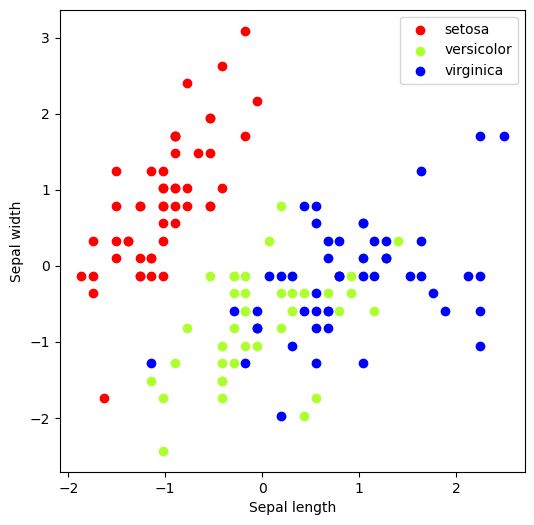

In [41]:
import matplotlib.pyplot as plt

colors_list=['red','greenyellow','blue']
fig, axes = plt.subplots(figsize=(6,6))
for i in range(len(colors_list)):
    xs=x_iris[:,0][y_iris==i]
    ys=x_iris[:,1][y_iris==i]
    axes.scatter(xs,ys,c=colors_list[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

##  Linear classification using stochastic gradient descent

In this method, classification is done by separating each species from the rest by _hyperplanes_ in the _feature space_. In the 2D space, these hyperplanes are straight lines. 

In [2]:
from sklearn.linear_model import SGDClassifier

# The classification model is stochastic gradient classifier
clf_model=SGDClassifier()

# We will use sepal length/width as features
features=x_iris[:,0:2]

# Label needed for classification are 0,1,2
label=y_iris

# Fit
clf_model.fit(features, label)

# Coefficients and intercepts to define the hyperplane
coeffs=clf_model.coef_
intercept=clf_model.intercept_

### Visualize the hyerplanes

Since we have three labels, we will have three hyperplanes each defined in terms of coefficients and intercepts. 

In [3]:
print(coeffs)

[[-26.78897048  14.40214322]
 [ -1.88882105  -4.18648315]
 [  8.40106741   0.96620786]]


In [4]:
print(intercept)

[-14.64465396  -3.49123871  -1.21944525]


The first hyperplane is defined by the equation $i_1 + c_{11} x_1 + c_{12} x_2=0 \Rightarrow x_2 = -i_1/c_{12} - c_{11}/c_{12} x_1=(-i_1-c_{11}x_1)/c_{12}$, which is an equation of a straight line. 

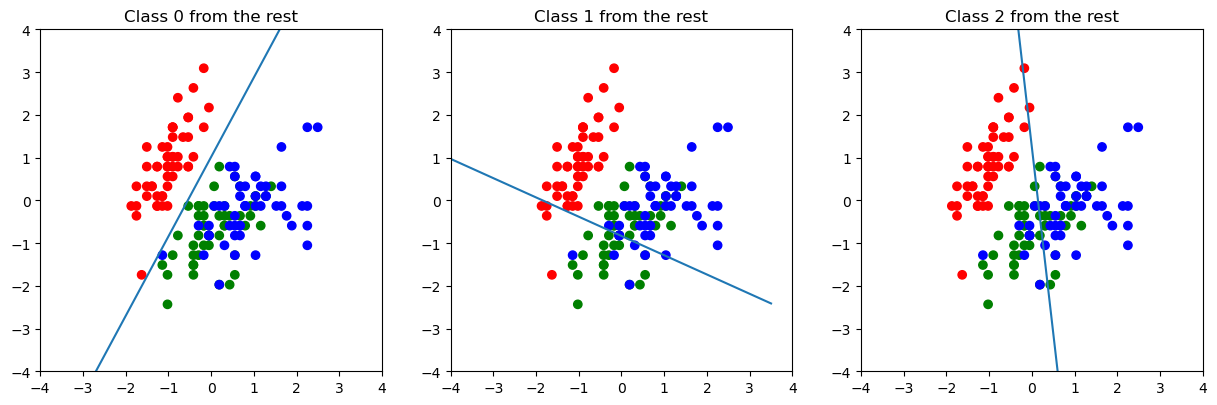

In [5]:
x1_min, x1_max = -4, 4 # x-range
x2_min, x2_max = -4, 4 # y-range

xs = np.arange(x1_min, x1_max, 0.5)

fig, axes = plt.subplots(1,3,figsize=(15,15))

for i in [0, 1, 2]:
    axes[i].set_aspect(1.0)
    axes[i].set_title('Class '+str(i)+' from the rest')
    axes[i].set_xlim(x1_min, x1_max)
    axes[i].set_ylim(x2_min, x2_max)
    axes[i].scatter(features[:,0], features[:,1], c=colors)
    ys=(-intercept[i]-xs*coeffs[i,0])/coeffs[i,1]   # straight line
    axes[i].plot(xs,ys)

From the first plot it appears that we can easily separate (i.e. classify) the class-0 from the other classes with a  straight line in the plane splanned by sepal length and sepal width. From the second and third plot, we see hat it is hard to classify between class-1 and class-2.

In [6]:
from sklearn import metrics

# predict y using the features
y_pred=clf_model.predict(features)

In [7]:
print(metrics.classification_report(y_pred,y_iris))

# Try
# print(metrics.classification_report(y_pred,y_iris,target_names=iris.target_names))
# Try
# print(metrics.classification_report(y_pred,y_iris),labels=np.unique(y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.56      0.78      0.65        36
           2       0.86      0.66      0.75        65

    accuracy                           0.80       150
   macro avg       0.80      0.81      0.80       150
weighted avg       0.83      0.80      0.80       150



The column `precision` gives the scores for classification. We see that the score is very high for class-0 compared to the other two classes as in agreement with the plots discussed above. You can also get an overall score for all classes.

In [8]:
print(metrics.accuracy_score(y_pred,label)) # Global score for the entire problem

0.8


If you are interested in seeing whether during prediction, you have assigned a class which is not present at all in the original list of labels, you can try the following.

In [43]:
set(y_iris)

{0, 1, 2}

In [44]:
set(y_pred)

{0, 1, 2}

In [45]:
set(y_iris) - set(y_pred)

set()

## Using all four features

In [10]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

sc = StandardScaler()
x_iris = sc.fit_transform(x_iris)

clf_model=SGDClassifier()
clf_model.fit(x_iris, y_iris)

y_pred=clf_model.predict(x_iris)

print(metrics.classification_report(y_pred,y_iris,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.90      0.98      0.94        46
   virginica       0.98      0.91      0.94        54

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [11]:
print('Overall score:',metrics.accuracy_score(y_pred,label))

Overall score: 0.96


It is not possible to visualize the hyperplanes in the 4D feature space to get a visual picture of how different classes are separated. 

## Training and Testing

Remember, the data analytics tehcniques that we have been discussing have become so popular because, these models once trained over a selected set of data are applicable to perform the same task in a new data. Further, these models also improve their performance as more and more data are used for re-training them. Hence, we say that these models learn and also denote them as machine learning methods. 

Here, the term _machine_ stands for the algorithm and not the computer as it is sometimes mis-interpreted.  To demonstrate this approach, let's divide the iris dataset into training and test sets using an 80/20 split. 

In [12]:
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

sc = StandardScaler()
x_iris = sc.fit_transform(x_iris)

x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.2, random_state=0)

clf_model=SGDClassifier()
clf_model.fit(x_train, y_train)

SGDClassifier()

In [13]:
y_pred_training=clf_model.predict(x_train)
print(metrics.classification_report(y_pred_training,y_train,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        39
  versicolor       0.92      0.94      0.93        36
   virginica       0.95      0.93      0.94        45

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [14]:
print(metrics.accuracy_score(y_pred_training,y_train))

0.9583333333333334


In [15]:
y_pred=clf_model.predict(x_test)
print(metrics.classification_report(y_pred,y_test,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.93      0.96        14
   virginica       0.83      1.00      0.91         5

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [16]:
print(metrics.accuracy_score(y_pred,y_test))

0.9666666666666667


Overall, what we have done so far is to develop a classification model using 80% of the iris dataset and applied the same model (i.e. coefficients and intercepts) to predict the labels of the remaining 20% of the dataset. When we compare `y_pred` against the actual labels of the test set collected in `y_test`, we have gotten a very good score of > 0.95. NOTE: due to random shuffling, the score may vary if you run the code again.

## Error metrics

The scores `precision` and `recall` are scores based on the fraction of labels we got correct. 

If an actual label is 0 and the model predicts it correctly as 0, then we say that the prediction is a `True positive` for class 0 (or label 0). On the other hand, if the actual label is 0 and the model predicts it wrongly, we say that the prediction is a `False negative` for class 0.

If the prediction is 0 but the actual class is not 0, then the prediction is a `False positive` for class 0. Finally, if the prediction is not 0, and the actual class is also not 0, then the prediction is a `True negative` for class 0. Note that in the last case, the actual and the predicted classes need to be the same.

The following table should make these terms easy to understand. 

**Actual label**| $~$|**Classified as** | $~$
:-----:|:-----:|:-----:|:-----:
        |$~$ | setosa           |Not setosa
setosa|$~$|True positive ($TP$)  |False negative ($FN$) 
Not setosa|$~$|False positive ($FP$) |True negative ($TN$)

### Precision

`Precision` is the fraction of entries predicted to be in a class, that are correct predictions.
$$
{\rm Precision\,of\,setosa}=\frac{\rm Correct\,predictions\,of\,setosa}{\rm All\,predicted\,to\,be\,setosa}
$$
In other words, for any class,
$$
{\rm Precision}=\frac{TP}{TP+FP}
$$

### Recall

`Recall` is the fraction of entries that are actually in class predicted correctly.
$$
{\rm Recall\,of\,setosa}=\frac{\rm Correct\,predictions\,of\,setosa}{\rm All\,actually\,in\,setosa}
$$
In other words, for any class,
$$
{\rm Recall}=\frac{TP}{TP+FN}
$$

We can code these functions and see if they agree with the scores printed above.

In [17]:
def PandN(y_pred,y_test):
    
    N_vals=len(y_pred)
    
    # get unique set of labels
    y_test_uniq=list(set(y_test))
    
    N_label=len(y_test_uniq)
    
    TP=np.zeros(N_label)
    TN=np.zeros(N_label)
    FP=np.zeros(N_label)
    FN=np.zeros(N_label)
    
    for i_label in range(0,N_label):
        for i_vals in range(0,N_vals):
            
            if ((y_test[i_vals] == y_test_uniq[i_label]) & (y_pred[i_vals] == y_test_uniq[i_label])):
                TP[i_label]=TP[i_label]+1
            if ((y_test[i_vals] == y_test_uniq[i_label]) & (y_pred[i_vals] != y_test_uniq[i_label])):
                FP[i_label]=FP[i_label]+1
            if ((y_test[i_vals] != y_test_uniq[i_label]) & (y_pred[i_vals] == y_test_uniq[i_label])):
                FN[i_label]=FN[i_label]+1
            if ((y_test[i_vals] != y_test_uniq[i_label]) & (y_pred[i_vals] != y_test_uniq[i_label])):
                TN[i_label]=TN[i_label]+1
                
    return TP, TN, FP, FN

In [18]:
TP, TN, FP, FN = PandN(y_pred,y_test)
print(TP, TN, FP, FN)

[11. 13.  5.] [19. 16. 24.] [0. 0. 1.] [0. 1. 0.]


Small values for $FP$ and $FN$ means that the prediction is good.

In [19]:
y_test_uniq=list(set(y_test))
    
N_label=len(y_test_uniq)

for i_label in range(0, N_label):
    Precision=TP[i_label]/(TP[i_label] + FP[i_label])
    Recall=TP[i_label]/(TP[i_label] + FN[i_label])
    print('Precision for class ',i_label,' is', Precision, ', Recall for class ',i_label,' is', Recall)

Precision for class  0  is 1.0 , Recall for class  0  is 1.0
Precision for class  1  is 1.0 , Recall for class  1  is 0.9285714285714286
Precision for class  2  is 0.8333333333333334 , Recall for class  2  is 1.0


Our code agrees with the values given by `sklearn`.

### Another test for `Precision` and `Recall`

We'll make the model worse by training on few entries and testing on more data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.5, random_state=0)

clf_model=SGDClassifier()
clf_model.fit(x_train, y_train)

y_pred=clf_model.predict(x_test)

print(metrics.classification_report(y_pred,y_test,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      0.81      0.89        26
  versicolor       0.83      0.86      0.85        29
   virginica       0.83      1.00      0.91        20

    accuracy                           0.88        75
   macro avg       0.89      0.89      0.88        75
weighted avg       0.89      0.88      0.88        75



In [21]:
print(metrics.accuracy_score(y_pred,y_test))

0.88


In [22]:
TP, TN, FP, FN = PandN(y_pred,y_test)
print(TP, TN, FP, FN)

[21. 25. 20.] [49. 41. 51.] [0. 5. 4.] [5. 4. 0.]


In [23]:
y_test_uniq=list(set(y_test))
    
N_label=len(y_test_uniq)

for i_label in range(0, N_label):
    Precision=TP[i_label]/(TP[i_label] + FP[i_label])
    Recall=TP[i_label]/(TP[i_label] + FN[i_label])
    print('Precision for class ',i_label,' is', Precision, ', Recall for class ',i_label,' is', Recall)

Precision for class  0  is 1.0 , Recall for class  0  is 0.8076923076923077
Precision for class  1  is 0.8333333333333334 , Recall for class  1  is 0.8620689655172413
Precision for class  2  is 0.8333333333333334 , Recall for class  2  is 1.0


Now we are even more confident that our formulas for `Precision` and `Recall` are indeed correct.

### F1-score

`F1-score` is combines `Precision` and `Recall`. 
$$
{\rm F1-score}=\frac{TP}{TP+(FP+FN)/2}
$$

In [24]:
y_test_uniq=list(set(y_test))
    
N_label=len(y_test_uniq)

Precision=np.zeros(N_label)
Recall=np.zeros(N_label)
F1score=np.zeros(N_label)

for i_label in range(0, N_label):
    
    Precision[i_label]=TP[i_label]/(TP[i_label] + FP[i_label])
    Recall[i_label]=TP[i_label]/(TP[i_label] + FN[i_label])
    F1score[i_label]=TP[i_label]/(TP[i_label] + (FN[i_label]+FP[i_label])/2)
    
    print('Precision for class ',i_label,' is', Precision[i_label])
    print('Recall for class    ',i_label,' is', Recall[i_label])
    print('F1-score for class  ',i_label,' is', F1score[i_label])
    print('')

Precision for class  0  is 1.0
Recall for class     0  is 0.8076923076923077
F1-score for class   0  is 0.8936170212765957

Precision for class  1  is 0.8333333333333334
Recall for class     1  is 0.8620689655172413
F1-score for class   1  is 0.847457627118644

Precision for class  2  is 0.8333333333333334
Recall for class     2  is 1.0
F1-score for class   2  is 0.9090909090909091



Why do we need so many versions of scores? These are needed because different datasets can have disproportionate number of entries in each class. In that case, one score may capture the accuracy of the model better than the other. 

### Support and Global metric

Okay, now let's look at the overall accuracy score of the model.

In [25]:
print(metrics.classification_report(y_pred,y_test,target_names=iris.target_names,digits=6))

              precision    recall  f1-score   support

      setosa   1.000000  0.807692  0.893617        26
  versicolor   0.833333  0.862069  0.847458        29
   virginica   0.833333  1.000000  0.909091        20

    accuracy                       0.880000        75
   macro avg   0.888889  0.889920  0.883389        75
weighted avg   0.891111  0.880000  0.879895        75



In [26]:
print(metrics.accuracy_score(y_pred,y_test))

0.88


The overall score is the weighted average of `recall`.  

To find the weighted average, we need weights! What are these? These are fractions of $TP$ and $FN$ per class.

In [27]:
support = TP + FN
print(support)

[26. 29. 20.]


In [28]:
weights=support/np.sum(support)
print(weights)

[0.34666667 0.38666667 0.26666667]


In [29]:
macro_avg_Recall=np.mean(Recall)
print(macro_avg_Recall)

0.889920424403183


In [30]:
weighted_avg_Recall=np.sum(Recall*weights)
print(weighted_avg_Recall)

0.8799999999999999


The last quantity is the same as `metrics.accuracy_score(y_pred,y_test)`